In [11]:
pip install praw pandas nltk matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [12]:
import praw
import pandas as pd
import nltk
import re
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91928\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91928\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:

reddit = praw.Reddit(
    client_id='w5cMm6-XzKqiChST8sQTKA',   
    client_secret='JbAXBFqUxj3oQkwuzOP1mTGkSfn-dQ',  
    user_agent='Social Media Sentiment Analysis/0.1 by BeAst_9284'  
)

def fetch_reddit_data(subreddit_name, limit=100):
    subreddit = reddit.subreddit(subreddit_name)
    posts = []
    
    for post in subreddit.new(limit=limit):
        posts.append([post.title, post.selftext, post.score, post.created_utc])
    
    return pd.DataFrame(posts, columns=['Title', 'Content', 'Score', 'Created'])

df = fetch_reddit_data('technology', limit=100)
print(df.head())

                                               Title Content  Score  \
0  Amazon’s Moonshot Plan to Rival Nvidia in AI C...              1   
1  Watchdog sues Webjet for allegedly making misl...              2   
2  Reddit overtakes X in popularity of social med...            295   
3  China warns of 'necessary actions' if US escal...              2   
4  Terabit-scale high-fidelity diamond data storage               2   

        Created  
0  1.732792e+09  
1  1.732791e+09  
2  1.732791e+09  
3  1.732790e+09  
4  1.732784e+09  


In [14]:

def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  
    text = re.sub(r'\@\w+|\#', '', text)  
    text = text.lower()  
    text = re.sub(r'[^a-zA-Z\s]', '', text)  
    return text

df['Clean_Title'] = df['Title'].apply(clean_text)
df['Clean_Content'] = df['Content'].apply(clean_text)

In [15]:

sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    return sia.polarity_scores(text)['compound']

df['Title_Sentiment'] = df['Clean_Title'].apply(get_sentiment)
df['Content_Sentiment'] = df['Clean_Content'].apply(get_sentiment)

print(df[['Title', 'Title_Sentiment', 'Content', 'Content_Sentiment']].head())

                                               Title  Title_Sentiment Content  \
0  Amazon’s Moonshot Plan to Rival Nvidia in AI C...          -0.0258           
1  Watchdog sues Webjet for allegedly making misl...          -0.8020           
2  Reddit overtakes X in popularity of social med...           0.4767           
3  China warns of 'necessary actions' if US escal...          -0.1027           
4  Terabit-scale high-fidelity diamond data storage            0.3400           

   Content_Sentiment  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  


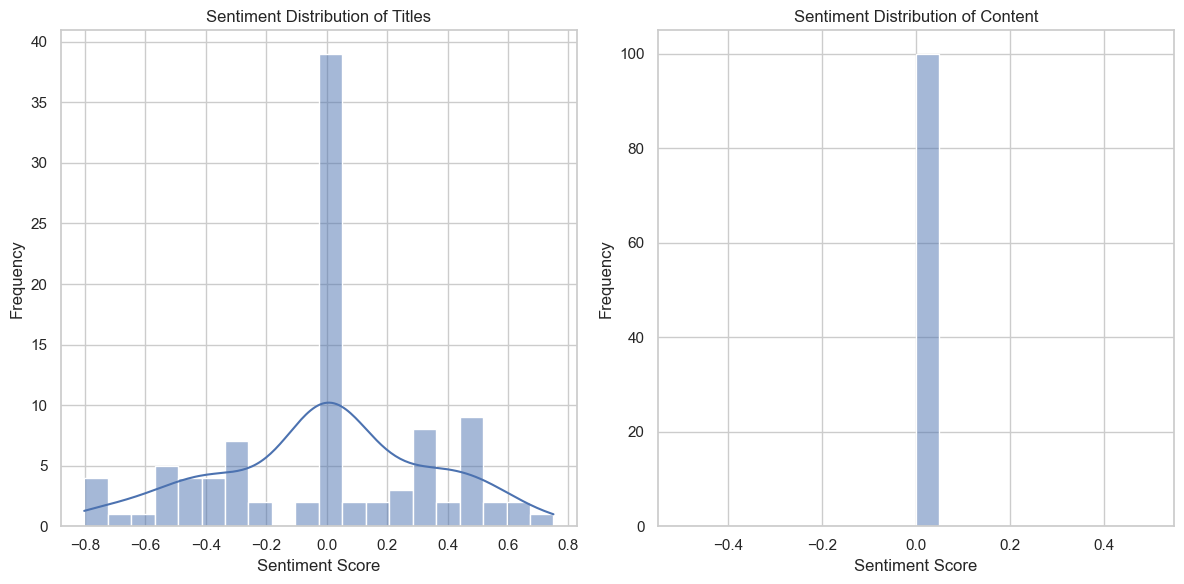

In [16]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Title_Sentiment'], bins=20, kde=True)
plt.title('Sentiment Distribution of Titles')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Content_Sentiment'], bins=20, kde=True)
plt.title('Sentiment Distribution of Content')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

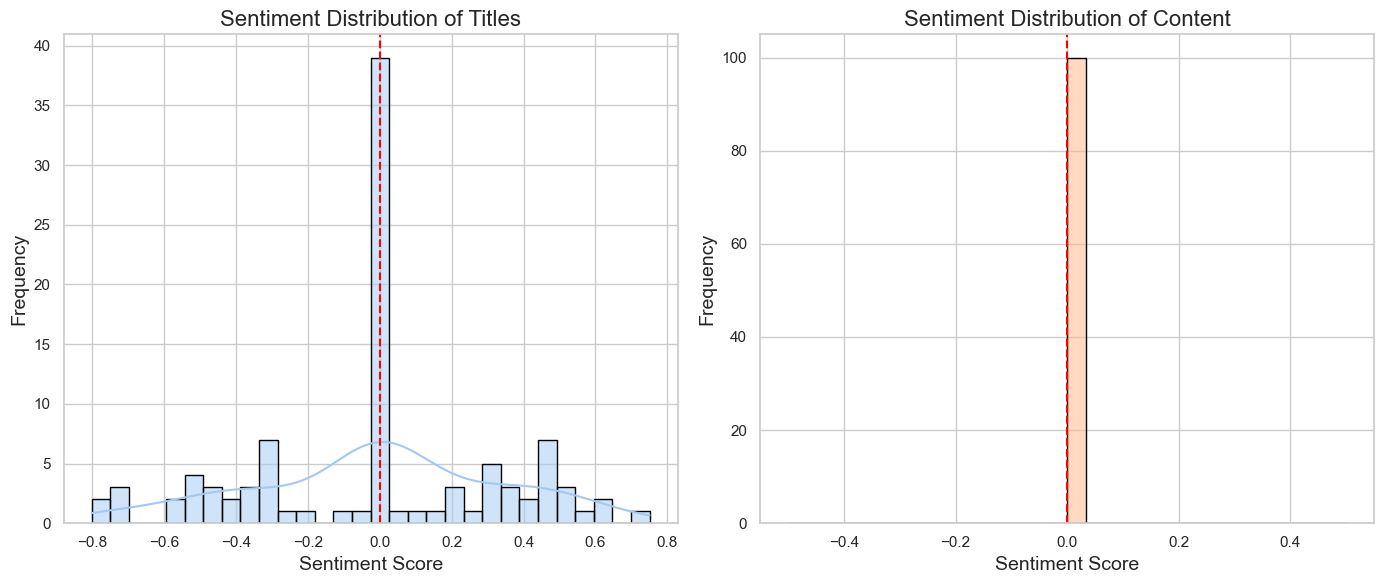

In [17]:
sns.set(style="whitegrid")
colors = sns.color_palette("pastel")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Title_Sentiment'], bins=30, kde=True, color=colors[0], edgecolor='black')
plt.title('Sentiment Distribution of Titles', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(x=0, color='red', linestyle='--')  # Add a vertical line at x=0 for neutral sentiment

plt.subplot(1, 2, 2)
sns.histplot(df['Content_Sentiment'], bins=30, kde=True, color=colors[1], edgecolor='black')
plt.title('Sentiment Distribution of Content', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(x=0, color='red', linestyle='--')  # Add a vertical line at x=0 for neutral sentiment

plt.tight_layout()
plt.show()

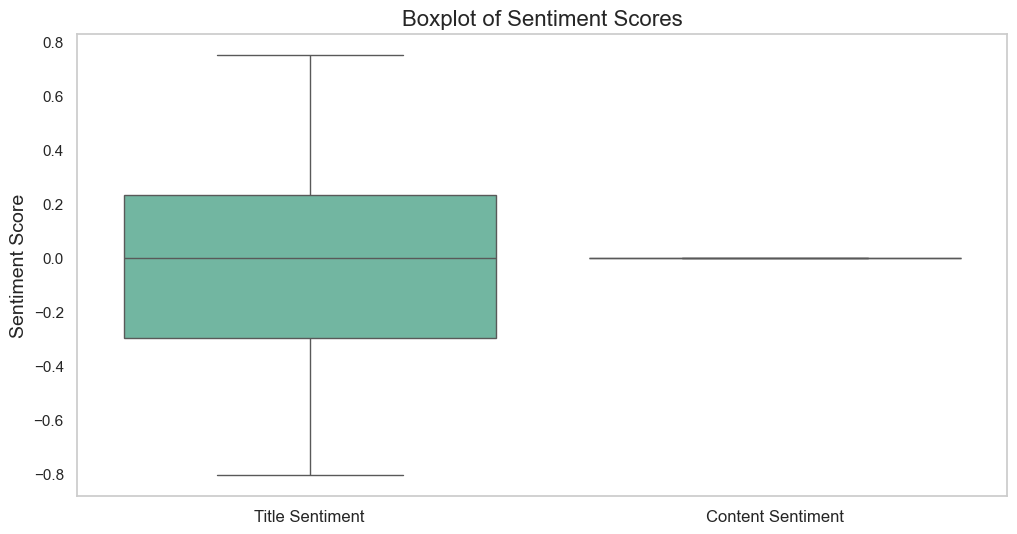

In [18]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Title_Sentiment', 'Content_Sentiment']], palette="Set2")
plt.title('Boxplot of Sentiment Scores', fontsize=16)
plt.ylabel('Sentiment Score', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Title Sentiment', 'Content Sentiment'], fontsize=12)
plt.grid(axis='y')

plt.show()

C:\Users\91928\AppData\Local\Temp\ipykernel_1944\3851825054.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Title_Sentiment_Category', palette="viridis")
C:\Users\91928\AppData\Local\Temp\ipykernel_1944\3851825054.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Content_Sentiment_Category', palette="viridis")


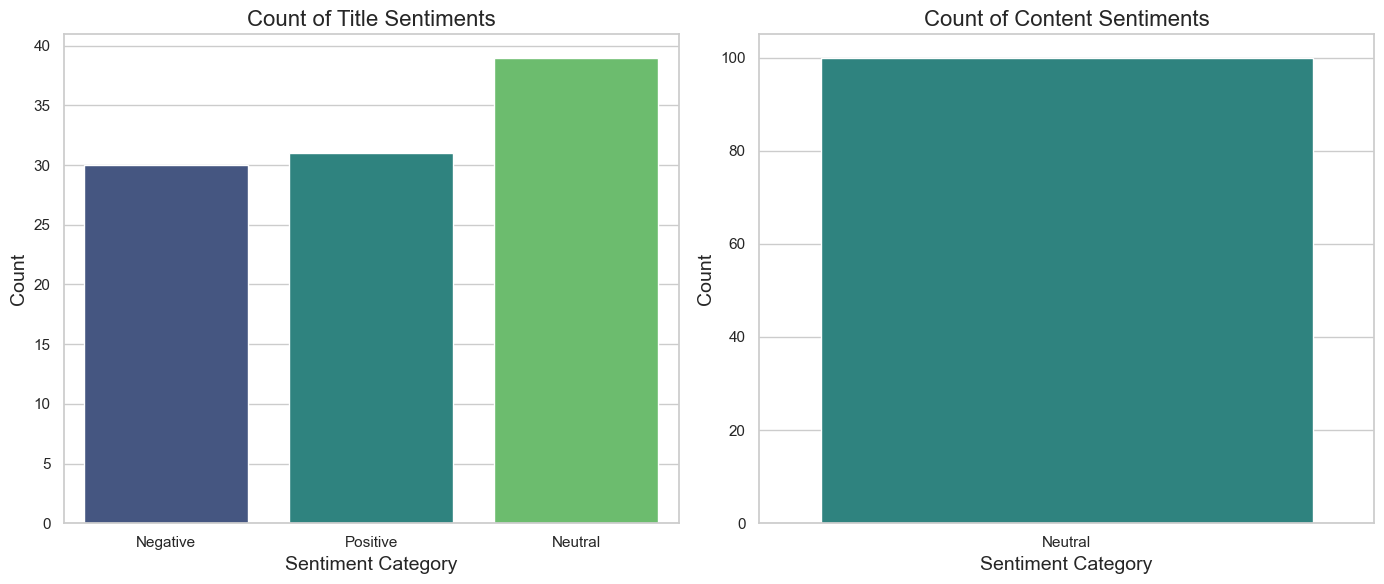

In [19]:
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Title_Sentiment_Category'] = df['Title_Sentiment'].apply(categorize_sentiment)
df['Content_Sentiment_Category'] = df['Content_Sentiment'].apply(categorize_sentiment)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Title_Sentiment_Category', palette="viridis")
plt.title('Count of Title Sentiments', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Content_Sentiment_Category', palette="viridis")
plt.title('Count of Content Sentiments', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.tight_layout()
plt.show()